Step 1 - Import python libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import scipy
import pandas.util.testing as tm
pd.options.mode.chained_assignment = None

Step 2 - Load and read the data file
1.   Upload data file from Google drive and run the notebook in the cloud
2.   Upload data file from local computer and run the notebook in the cloud
3.   Load data file from local computer and run the notebook locally

Step 2 - Option 1 - Upload data file from Google drive

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

In [3]:
#change the file name ("COVID_samples.tsv") to your file name to load the data
df=pd.read_table('/content/drive/MyDrive/COVID_samples.tsv')
df

Step 2 - Option 2 - Upload data file from local computer


In [4]:
from google.colab import files 
uploaded = files.upload()

In [5]:
import io

#change the file name ("COVID_samples.tsv") to your file name to load the data
df = pd.read_table(io.BytesIO(uploaded['complete_samples.tsv']), sep = '\t')
df

Step 2 - Option 3 - Run the notebook locally (refer here for how to connect to local runtime https://research.google.com/colaboratory/local-runtimes.html)

In [10]:
#change the file name ("COVID_samples.tsv") to your file name to load the data
df = pd.read_table('../../../downloads/covid_data/complete_COVID_samples.tsv', sep = '\t',low_memory=False)
df

,sample,frequency,templates,amino_acid,rearrangement,v_resolved,d_resolved,j_resolved,age,gender,...,icu_admit,birth_year,blood_type,cmv_at_donation,days_from_last_symptom_to_sample,ethnicity,height_meters,hospitalized,weight_kg,race
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,72,Male,...,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,33,Female,...,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,33,Female,...,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,33,Female,...,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,33,Female,...,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian


Step 3 - Create the standardized format (column content and column names)
1.   Sample name (sample)
2.   Clone frequency (freq)
3.   Clone reads count (#count)
4.   CDR3 amino acid clonotype (cdr3aa)
5.   CDR3 nucleotide (cdr3nt)
6.   V gene (v)
7.   D gene (d)
8.   J gene (j)
9.   Optional - Sample feature (here we use hospitalization as the clinical feature)

In [11]:
#select the columns that are listed above
df = df[['sample','frequency', 'templates', 'amino_acid', 'rearrangement', 'v_resolved', 'd_resolved','j_resolved','hospitalized']]
#rename the columns 
df.columns = ['sample', 'freq' , '#count' , 'cdr3aa' , 'cdr3nt' , 'v' , 'd' , 'j' , 'hospitalization']
df

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,hospitalization
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,True
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,True
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,True
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,True
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,True
...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,False
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,False
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,False
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,False


Motif analysis 1 - Amino acid spectratype

In [14]:
#add CDR3 amino acid length as a new column
df['aa_length'] = df['cdr3aa'].str.len()

df_aa_spectratype=df.groupby(['sample','hospitalization','aa_length'], as_index=False)['freq'].agg({'spectratype':'sum'})
df_aa_spectratype

,sample,hospitalization,aa_length,spectratype
0,1132289BW_TCRB,False,1,0.000001
1,1132289BW_TCRB,False,2,0.000001
2,1132289BW_TCRB,False,3,0.000001
3,1132289BW_TCRB,False,4,0.000017
4,1132289BW_TCRB,False,5,0.000013
...,...,...,...,...
1188,989003BW_TCRB,True,23,0.000224
1189,989003BW_TCRB,True,24,0.000082
1190,989003BW_TCRB,True,25,0.000059
1191,989003BW_TCRB,True,26,0.000017


Motif analysis 1.1 - Show the most frequent amino acid length in each sample

In [15]:
df_aa_max_spectratype = df_aa_spectratype.loc[df_aa_spectratype.groupby('sample')['spectratype'].idxmax()]
df_aa_max_spectratype

,sample,hospitalization,aa_length,spectratype
13,1132289BW_TCRB,False,14,0.193850
40,1222568BW_TCRB,False,15,0.190543
65,1337122BW_TCRB,False,14,0.243901
90,1445BW_TCRB,False,14,0.220508
116,1564208BW_TCRB,False,14,0.186892
141,1566265BW_TCRB,False,14,0.201397
167,1566319BW_TCRB,False,15,0.196720
192,1566426BW_TCRB,False,15,0.207125
218,1566449BW_TCRB,False,15,0.182232
244,1566486BW_TCRB,False,15,0.179339


Motif analysis 1.2 - Amino acid motif count (result table)

In [24]:
#define the function to count amino acid motifs (k is the length of the motif)
def aamotif(k, aa_list):
    aamotifCount={}
    for aa in aa_list:
        for i in range(len(aa)-k+1):
            aamotif = aa[i:i+k]
            aamotifCount [aamotif] = aamotifCount.get(aamotif,0)+1
    return aamotifCount 

#create an empty dataframe for storing results
df_aa_motif = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    #store the rows related to the sample 
    df_temp = df.loc[df['sample'] == sample]

    #use amino acid motif length of 6 as an example
    df_temp = aamotif(6, df_temp['cdr3aa'])
    df_temp = pd.DataFrame(df_temp.items(), columns=['motif', 'count'])
    df_temp['sample'] = sample

    #append the dataframe based on amino acid motifs and stores in the result dataframe
    df_aa_motif = df_aa_motif.append(df_temp, ignore_index=True) 

    #add the hospitalization information as a column
    df_aa_motif_1 = df_aa_motif.merge(df_aa_max_spectratype[['sample','hospitalization']], on='sample')

df_aa_motif_1

,motif,count,sample,hospitalization
0,CASSSS,1244,1566426BW_TCRB,False
1,ASSSSG,508,1566426BW_TCRB,False
2,SSSSGG,84,1566426BW_TCRB,False
3,SSSGGW,12,1566426BW_TCRB,False
4,SSGGWN,3,1566426BW_TCRB,False
...,...,...,...,...
38430039,SVGEYT,1,1566779BW_TCRB,False
38430040,VGEYTT,1,1566779BW_TCRB,False
38430041,GEYTTG,1,1566779BW_TCRB,False
38430042,EYTTGY,1,1566779BW_TCRB,False


In [32]:
#show the most abundant amino acid motif in each sample
df_aa_motif_most = df_aa_motif_1.loc[df_aa_motif_1.groupby('sample')['count'].idxmax()]
df_aa_motif_most

,motif,count,sample,hospitalization
29032578,TDTQYF,20474,1132289BW_TCRB,False
3230399,YNEQFF,19288,1222568BW_TCRB,False
20578564,NTEAFF,31076,1337122BW_TCRB,False
35390990,TDTQYF,25135,1445BW_TCRB,False
8004341,TDTQYF,20886,1564208BW_TCRB,False
29961875,NTEAFF,24931,1566265BW_TCRB,False
12329739,TDTQYF,22298,1566319BW_TCRB,False
38,YNEQFF,16955,1566426BW_TCRB,False
2303964,TDTQYF,22544,1566449BW_TCRB,False
15584753,YNEQFF,42606,1566486BW_TCRB,False


Motif analysis 1.3 - Amino acid motif count (plots)

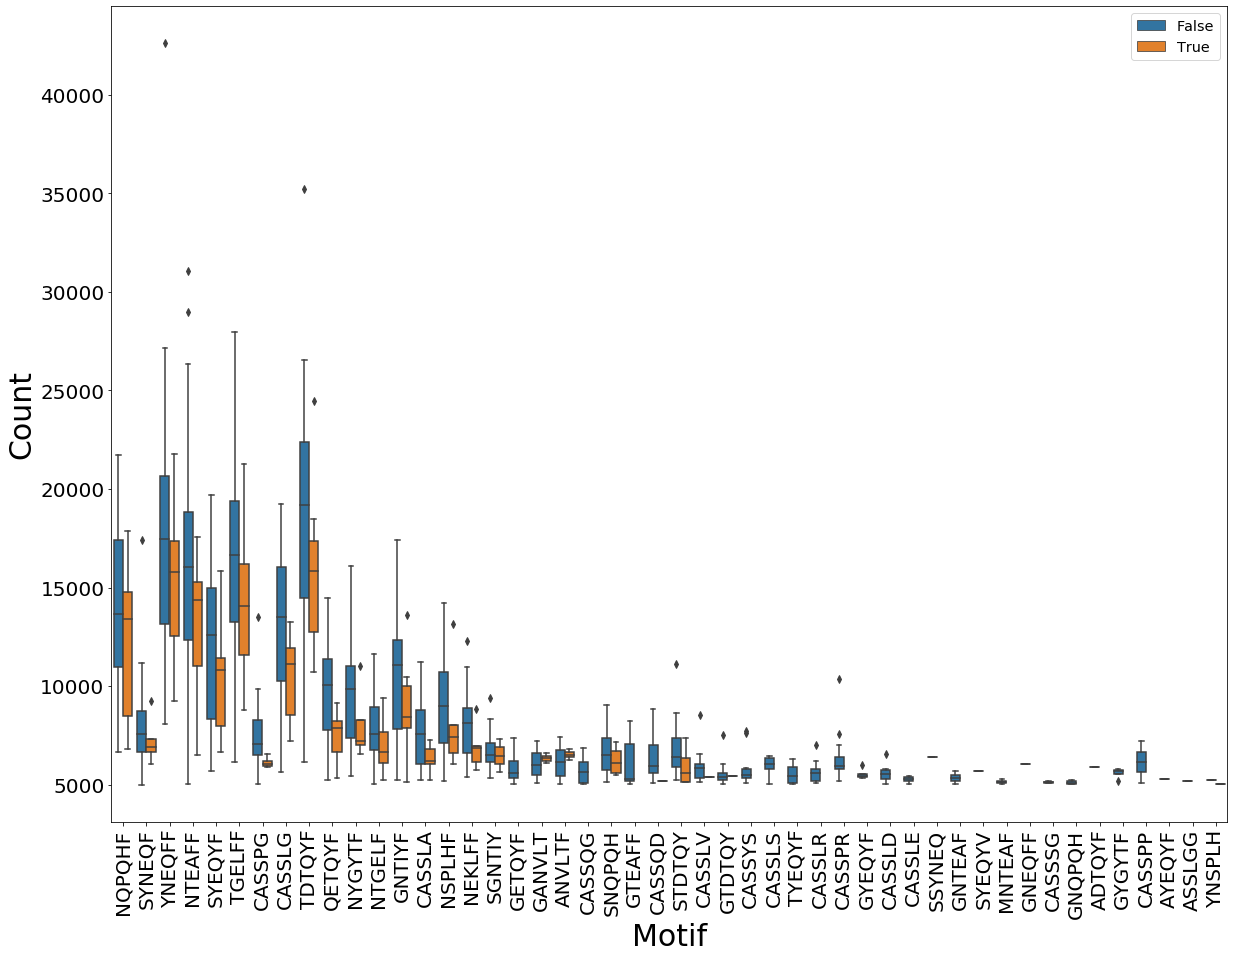

In [33]:
#remove motif counts that are less than 4999
df_aa_motif_1 = df_aa_motif_1[df_aa_motif_1['count'] > 5000]

ax = plt.subplots(figsize = (20,15))
ax = sns.boxplot(data=df_aa_motif_1,x='motif',y='count',hue='hospitalization')
plt.xticks(rotation=90)
ax.set_xlabel('Motif',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize='x-large', title_fontsize='50')

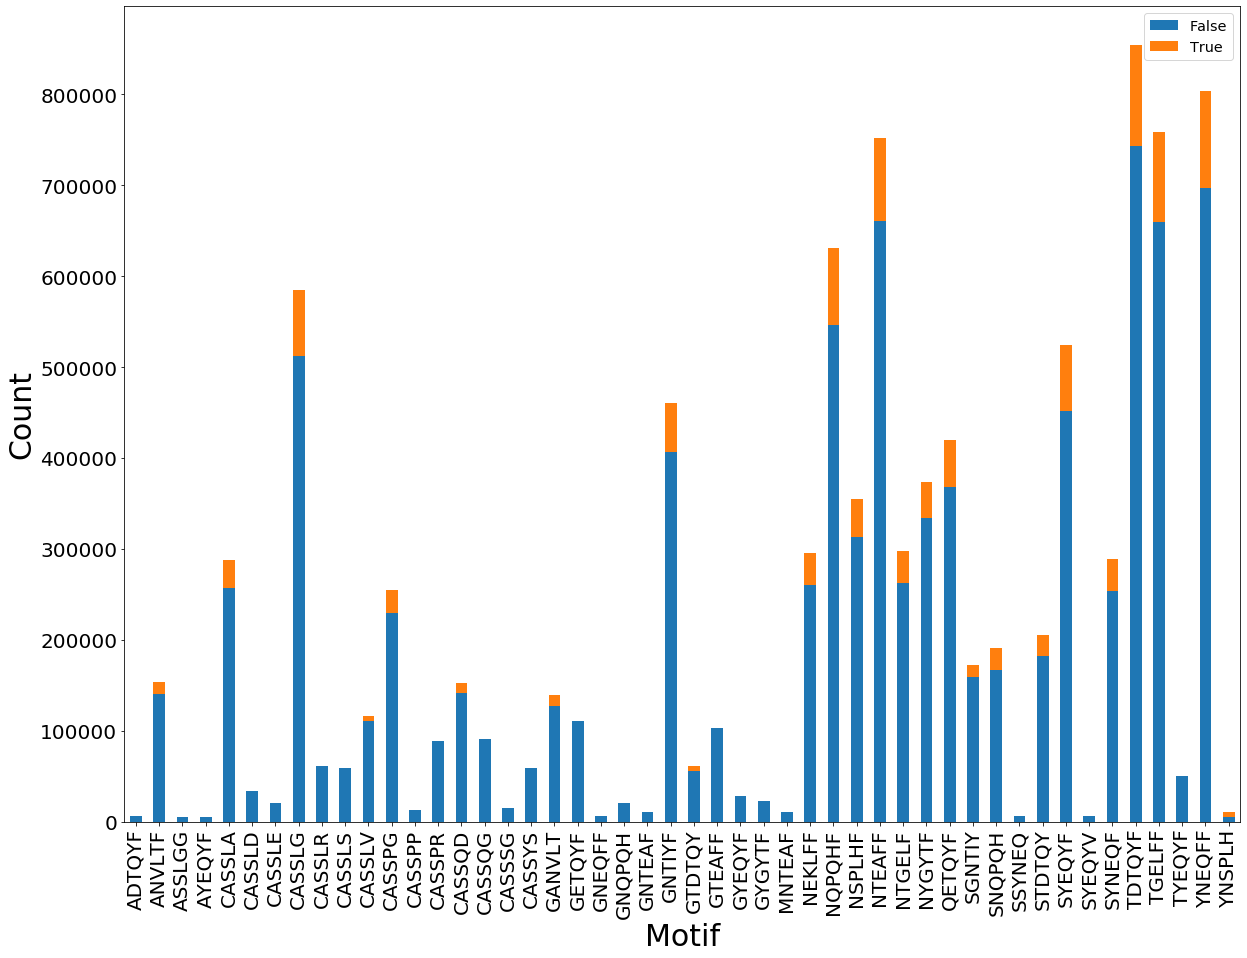

In [36]:
#remove motif counts that are less than 4999
df_aa_motif_1 = df_aa_motif_1[df_aa_motif_1['count'] > 5000]

ax = df_aa_motif_1.groupby(['motif','hospitalization'])['count'].sum().unstack().plot(kind='bar', stacked=True,figsize=(20,15))
ax.set_xlabel('Motif',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize='x-large', title_fontsize='50')

Motif analysis 2.1 - nucleotide sequence motif analysis (result table)

In [38]:
#define the function to count nucleotide motifs (k is the length of the motif)
def ntmotif(k, nt_list):
    ntmotifCount={}
    for nt in nt_list:
        for i in range(len(nt)-k+1):
            ntmotif = nt[i:i+k]
            ntmotifCount [ntmotif] = ntmotifCount.get(ntmotif,0)+1
    return ntmotifCount

#create an empty dataframe for storing results
df_nt_motif = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    #store the rows related to the sample 
    df_temp = df.loc[df['sample'] == sample]

    #use amino acid motif length of 6 as an example
    df_temp = ntmotif(6, df_temp['cdr3nt'])
    df_temp = pd.DataFrame(df_temp.items(), columns=['motif', 'count'])
    df_temp['sample'] = sample

    #append the dataframe based on amino acid motifs and stores in the result dataframe
    df_nt_motif = df_nt_motif.append(df_temp, ignore_index=True) 

    #add the hospitalization information as a column
    df_nt_motif_1 = df_nt_motif.merge(df_aa_max_spectratype[['sample','hospitalization']], on='sample')
  
df_nt_motif_1

,motif,count,sample,hospitalization
0,GAGTCG,10423,1566426BW_TCRB,False
1,AGTCGC,9462,1566426BW_TCRB,False
2,GTCGCC,9058,1566426BW_TCRB,False
3,TCGCCC,10508,1566426BW_TCRB,False
4,CGCCCA,10612,1566426BW_TCRB,False
...,...,...,...,...
197985,NNCCAC,1,1566779BW_TCRB,False
197986,NNNTGG,1,1566779BW_TCRB,False
197987,NNTGGC,1,1566779BW_TCRB,False
197988,NTGTCT,1,1566779BW_TCRB,False


In [42]:
#show the most abundant amino acid motif in each sample
df_nt_motif_most = df_nt_motif_1.loc[df_nt_motif_1.groupby('sample')['count'].idxmax()]
df_nt_motif_most

,motif,count,sample,hospitalization
151627,TCTGTG,333483,1132289BW_TCRB,False
16905,TCTGTG,293394,1222568BW_TCRB,False
109507,TCTGTG,419624,1337122BW_TCRB,False
185445,TCTGTG,422864,1445BW_TCRB,False
42169,TCTGTG,314155,1564208BW_TCRB,False
155869,TCTGTG,397414,1566265BW_TCRB,False
67357,TCTGTG,383961,1566319BW_TCRB,False
34,TCTGTG,253763,1566426BW_TCRB,False
12676,TCTGTG,323037,1566449BW_TCRB,False
84181,TCTGTG,466048,1566486BW_TCRB,False


Motif analysis 2.2 - Show the motif counts across the samples by bar plots 

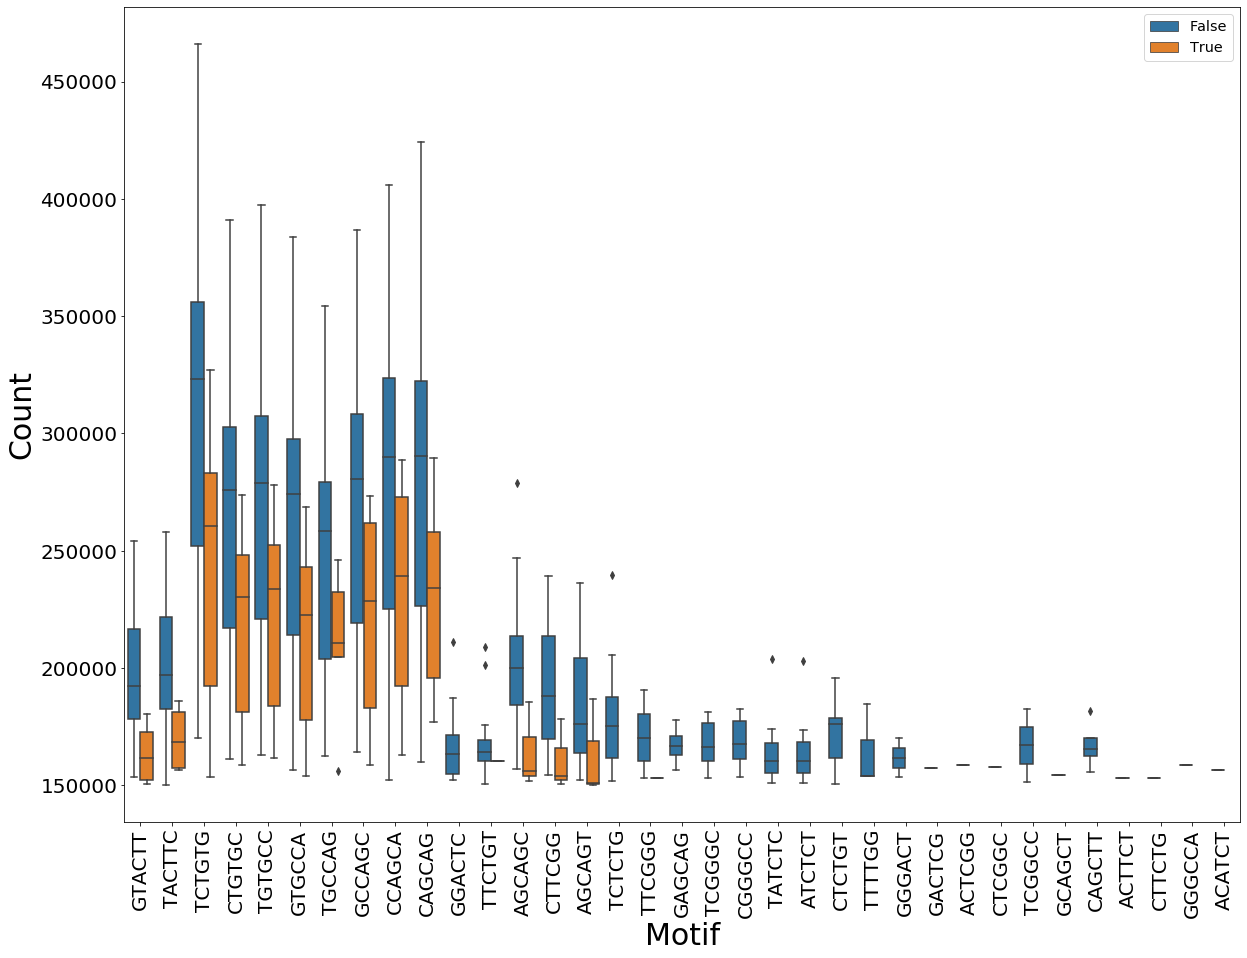

In [43]:
#remove motif counts that are less than 150000
df_nt_motif_1 = df_nt_motif_1[df_nt_motif_1['count'] > 149999]

ax = plt.subplots(figsize = (20,15))
ax = sns.boxplot(data=df_nt_motif_1,x='motif',y='count',hue='hospitalization')
plt.xticks(rotation=90)
ax.set_xlabel('Motif',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize='x-large', title_fontsize='50')

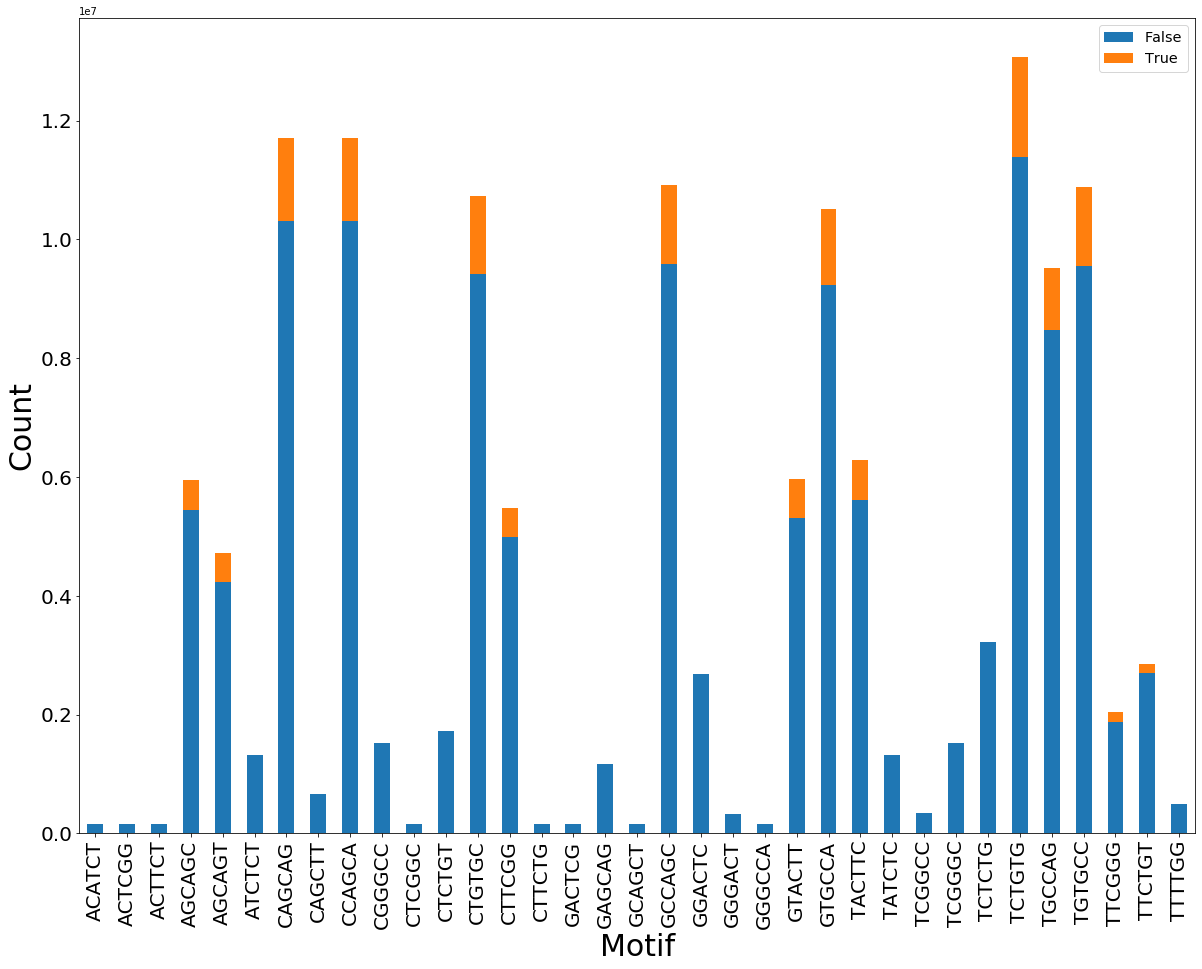

In [44]:
#remove motif counts that are less than 150000
df_nt_motif_1 = df_nt_motif_1[df_nt_motif_1['count'] > 149999]

ax = df_nt_motif_1.groupby(['motif','hospitalization'])['count'].sum().unstack().plot(kind='bar', stacked=True,figsize=(20,15))
ax.set_xlabel('Motif',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize='x-large', title_fontsize='50')